In [110]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facebook-recruiting-iii-keyword-extraction/Test.zip
/kaggle/input/facebook-recruiting-iii-keyword-extraction/Train.zip
/kaggle/input/facebook-recruiting-iii-keyword-extraction/SampleSubmission.csv


In [ ]:
df = pd.read_csv('../input/facebook-recruiting-iii-keyword-extraction/Train.zip', usecols=['Id', 'Title', 'Tags'])

In [111]:
df.shape

(6034195, 3)

In [112]:
df.head()

,Id,Title,Tags
0,1,How to check if an uploaded file is an image w...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,firefox
2,3,R Error Invalid type (list) for variable,r matlab machine-learning
3,4,How do I replace special characters in a URL?,c# url encoding
4,5,How to modify whois contact details?,php api file-get-contents


In [113]:
dup_data = df[df.duplicated(['Title', 'Tags'])]
dup_data.head()

,Id,Title,Tags
3081,3082,Content-disposition:inline header won't show i...,php image codeigniter http-headers content-dis...
3550,3551,Compatibility issues with <a> and calling a fu...,function anchor
5246,5247,Using JTA with Spring +hibernate JPA+Glassfish...,spring hibernate jpa glassfish jta
9968,9969,Groovy Properties Assertion Fails,properties groovy assert
10597,10598,Importance of isomorphic functions,functional-programming isomorphism


In [114]:
# print(f'Number of duplicate data = {dup_data.shape[0]}')
print(f'Out of {df.shape[0]} rows, {dup_data.shape[0]} rows are duplicate', end=' ')
print(f'i.e "{(dup_data.shape[0]/df.shape[0])*100} %" data is duplicate')

Out of 6034195 rows, 1848011 rows are duplicate i.e "30.62564269136148 %" data is duplicate


In [115]:
dup_count = df.pivot_table(index=['Title','Tags'], aggfunc='size')

In [116]:
no_of_dup_rows = pd.DataFrame(dup_count.value_counts())

In [118]:
no_of_dup_rows

,0
1,2622448
2,1280301
3,282830
4,408
5,144
6,33
7,9
9,2
8,2


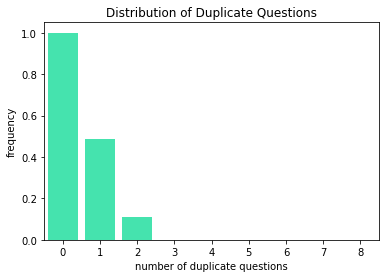

In [123]:
# sns.countplot(, )
sns.barplot(x=no_of_dup_rows.index.values,
            y=no_of_dup_rows[0],
           color=sns.xkcd_rgb['greenish cyan'])
plt.title('Distribution of Duplicate Questions')
plt.ylabel('frequency')
plt.xlabel('number of duplicate questions')
plt.show()

In [ ]:
df.drop_duplicates(subset=["Title"], inplace=True)

In [ ]:
df.dropna()
df.shape

In [ ]:
df['Tags count'] = df['Tags'].apply(lambda x: len(str(x).split(' ')))

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df = df[~df['Tags'].isnull()]
df.shape

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fig = plt.figure(figsize=[10,7])
sns.countplot(df['Tags count'])
plt.title('Distribution of tag count')
plt.ylabel('Frequency')
plt.xlabel('Tag count')
plt.show()

In [ ]:
tag_count = {}

for tags in df['Tags']:
    tags = str(tags).split(' ')
    for item in tags:
        try:
            tag_count[item] += 1
        except:
            tag_count[item] = 1

In [ ]:
sorted_tags_list = sorted(tag_count.items())
most_occuring_tags = sorted(sorted_tags_list, key=lambda x: x[1], reverse=True)

In [ ]:
most_occuring_tags_df = pd.DataFrame(most_occuring_tags, columns=['language', 'frequency'])

In [ ]:
fig = plt.figure(figsize=[20,10])
sns.barplot(x=most_occuring_tags_df['language'].iloc[:50],
            y=most_occuring_tags_df['frequency'].iloc[:50],
           color=sns.xkcd_rgb['greenish cyan'])
plt.title('Frequency of top 50 Tags')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [ ]:
more_than_10k_tags = most_occuring_tags_df[most_occuring_tags_df.frequency > 10000].language

print(f'{len(more_than_10k_tags)} tags are used more than 10000 times')

In [ ]:
more_than_100k_tags = most_occuring_tags_df[most_occuring_tags_df.frequency > 100000].language

print(f'{len(more_than_100k_tags)} tags are used more than 100000 times')

In [ ]:
print(f'{most_occuring_tags_df.language.iloc[0]} is used most frequent')

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

In [ ]:
import re
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

In [ ]:
def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    
    text = text.lower()  # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([char for char in text.split() if char not in STOPWORDS]) # delete stopwords from text
    text = text.strip()
    return text

In [ ]:
from tqdm import tqdm
tqdm.pandas()
# clean text data
df['Title'] = df['Title'].progress_apply(lambda x: text_prepare(str(x)))

In [ ]:
df.head()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
tag_vectorizer = CountVectorizer(tokenizer= lambda x: str(x).split(), binary=True)
y_mult = tag_vectorizer.fit_transform(df['Tags'])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# randomly select 90% rows for training and 10% rows for validation

# train, validate, test = np.split(df.sample(frac=1), [int(.8*len(df)), int(.9*len(df))])

X_train, X_test, Y_train, Y_test = train_test_split(df['Title'], y_mult, test_size=0.2, random_state=45)

In [ ]:
# X_train = train['Title'].values
# tqdm.pandas()
# y_train = train['Tags'].progress_apply(lambda x: str(x).split(' ')).values 

In [ ]:
# X_val = validate['Title'].values
# tqdm.pandas()
# y_val = validate['Tags'].progress_apply(lambda x: str(x).split(' ')).values 

In [ ]:
# X_test = test['Title'].values
# tqdm.pandas()
# y_test = test['Tags'].progress_apply(lambda x: str(x).split(' ')).values 

In [ ]:
X_train.shape, X_test.shape

In [ ]:
Y_train.shape, Y_test.shape

In [ ]:
print(Y_train)

In [ ]:
# Dictionary of all words from train corpus with their counts.
words_counts = {}

from collections import Counter
words_counts = Counter([word for line in X_train for word in line.split(' ')])

# OR
# from nltk import FreqDist
# words_counts = [FreqDist((' '.join(X_train)).split(' '))][0]

In [ ]:
most_common_tags = sorted(tag_count.items(), key=lambda x: x[1], reverse=True)[:10]
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:10]

print("10 most common tags: ", ','.join(tag for tag, _ in most_common_tags)) 
print("10 most common words: ", ','.join(word for word, _ in most_common_words))

**Transforming text to a vector:**

**Bag of Words:**

In [ ]:
DICT_SIZE = 5000
sorted_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)

WORDS_TO_INDEX = {item[0]: index for index, item in enumerate(sorted_words[:DICT_SIZE])}
INDEX_TO_WORDS = {index: item[0] for index, item in enumerate(sorted_words[:DICT_SIZE])}

ALL_WORDS = WORDS_TO_INDEX.keys()

In [ ]:
def my_bag_of_words(text, words_to_index, dict_size):
    """
        text: a string
        dict_size: size of the dictionary
        
        return a vector which is a bag-of-words representation of 'text'
    """
    result_vector = np.zeros(dict_size)
    for words in text.split():
        if words in words_to_index:
            result_vector[words_to_index[words]] += 1

    return result_vector

In [ ]:
# from scipy import sparse as sp_sparse

In [ ]:
# X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])
# X_val_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_val])
# X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])
# print('X_train shape ', X_train_mybag.shape)
# print('X_val shape ', X_val_mybag.shape)
# print('X_test shape ', X_test_mybag.shape)

In [ ]:
def tfidf_features(X_train, X_test):
    """
        X_train, X_val, X_test — samples        
        return TF-IDF vectorized representation of each sample and vocabulary
    """
    # Create TF-IDF vectorizer with a proper parameters choice
    # Fit the vectorizer on the train set
    # Transform the train, test, and val sets and return the result
    
    
    tfidf_vectorizer = TfidfVectorizer(token_pattern='(\S+)', min_df=5, max_df=0.9, ngram_range=(1,2))####### YOUR CODE HERE #######
    tfidf_vectorizer.fit(X_train)

    X_train = tfidf_vectorizer.transform(X_train)
#     X_val = tfidf_vectorizer.transform(X_val)
    X_test = tfidf_vectorizer.transform(X_test)
    
    return X_train, X_test, tfidf_vectorizer.vocabulary_

In [ ]:
X_train_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(X_train, X_test)

In [ ]:
X_train_tfidf.shape,  X_test_tfidf.shape

In [ ]:
Y_train.shape, Y_test.shape

In [ ]:
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

In [ ]:
print('c++' in tfidf_vocab)
print('c#' in tfidf_vocab)
print('java' in tfidf_vocab)
print('javascript' in tfidf_vocab)
print('python' in tfidf_vocab)

In [ ]:
# from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
# mlb = MultiLabelBinarizer(classes=sorted(tags_counts.keys()))
# y_train = mlb.fit_transform(y_train)
# y_val = mlb.fit_transform(y_val)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier

In [ ]:
def logistic_train_classifier(X_train, Y_train, C=1.0,penalty='l2'):
    """
      X_train, y_train — training data
      
      return: trained classifier
    """
    
    # Create and fit LogisticRegression wraped into OneVsRestClassifier.
    
    return OneVsRestClassifier(LogisticRegression(C=C, 
                                                  penalty=penalty, 
                                                  max_iter=1000)).fit(X_train, Y_train)

In [ ]:
def SGD_train_classifier(X_train, Y_train, loss='log', alpha=0.001, penalty='l1'):


    return OneVsRestClassifier(SGDClassifier(loss=loss,
                                                  alpha=alpha,
                                                  penalty=penalty),n_jobs=-1).fit(X_train, Y_train)

In [ ]:
classifier_logistic = logistic_train_classifier(X_train_tfidf, Y_train)

In [ ]:
classifier_sgd = SGD_train_classifier(X_train_tfidf, Y_train)

In [ ]:
Y_test_predicted_labels_tfidf_logistic = classifier_logistic.predict(X_test_tfidf)
Y_test_predicted_labels_tfidf_sgd = classifier_sgd.predict(X_test_tfidf)

In [ ]:
y_test_pred_inversed = mlb.inverse_transform(y_test_predicted_labels_tfidf_logistic)
y_test_inversed = mlb.inverse_transform(y_test)
for i in range(3):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_val[i],
        ','.join(y_test_inversed[i]),
        ','.join(y_test_pred_inversed[i])
    ))

In [ ]:
y_test_pred_inversed = mlb.inverse_transform(y_test_predicted_labels_tfidf_sgd)
y_test_inversed = mlb.inverse_transform(y_test)
for i in range(3):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_val[i],
        ','.join(y_test_inversed[i]),
        ','.join(y_test_pred_inversed[i])
    ))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [ ]:
def print_evaluation_scores(y_val, predicted):
    
    print(f"Accracy={accuracy_score(y_val, predicted)}")
    print(f"F1_macro={f1_score(y_val, predicted, average='macro')}")
    print(f"F1_micro={f1_score(y_val, predicted, average='micro')}")
    print(f"F1_wted={f1_score(y_val, predicted, average='weighted')}")
    print(f"Precsion_macro={average_precision_score(y_val, predicted, average='macro')}")
    print(f"Precsion_micro={average_precision_score(y_val, predicted, average='micro')}")
    print(f"Precsion_wted={average_precision_score(y_val, predicted, average='weighted')}")

In [ ]:
print('Logistic Classifier')
print_evaluation_scores(Y_test, Y_test_predicted_labels_tfidf_logistic)
print('SGD Classifier')
print_evaluation_scores(Y_test, Y_test_predicted_labels_tfidf_sgd)

In [ ]:
from sklearn.metrics import roc_auc
%matplotlib inline

In [ ]:
n_classes = len(tag_count)
roc_auc(Y_test, Y_test_predicted_scores_mybag, n_classes)

In [ ]:
n_classes = len(tag_count)
roc_auc(Y_test, Y_test_predicted_scores_tfidf, n_classes)

In [ ]:
def print_words_for_tag(classifier, tag, tags_classes, index_to_words, all_words):
    """
        classifier: trained classifier
        tag: particular tag
        tags_classes: a list of classes names from MultiLabelBinarizer
        index_to_words: index_to_words transformation
        all_words: all words in the dictionary
        
        return nothing, just print top 5 positive and top 5 negative words for current tag
    """
    print('Tag:\t{}'.format(tag))
    
    # Extract an estimator from the classifier for the given tag.
    # Extract feature coefficients from the estimator. 
    
    estimator = classifier.estimators_[tags_classes.index(tag)]

    coff = estimator.coef_[0]
    coff_idx = list(enumerate(coff))

    
    top_pos_words_idx = [idx for idx, wt in sorted(coff_idx, key=lambda x: x[1], reverse=True)[:5]]
    top_neg_words_idx = [idx for idx, wt in sorted(coff_idx, key=lambda x: x[1], reverse=False)[:5]]
    
    top_positive_words = [index_to_words[idx] for idx in top_pos_words_idx] # top-5 words sorted by the coefficiens.
    top_negative_words = [index_to_words[idx] for idx in top_neg_words_idx] # bottom-5 words  sorted by the coefficients.
    
    print('Top positive words:\t{}'.format(', '.join(top_positive_words)))
    print('Top negative words:\t{}\n'.format(', '.join(top_negative_words)))

In [ ]:
print_words_for_tag(classifier_logistic, 'c', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier_logistic, 'c++', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier_logistic, 'linux', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)

In [ ]:
print_words_for_tag(classifier_sgd, 'c', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier_sgd, 'c++', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier_sgd, 'linux', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)